In [1]:
import numpy as np
import matplotlib.pyplot as plt

## N Single-Particle Tunneling

Given Hamiltonian:
$$
H=\begin{bmatrix}
0&J&0\\
J&0&J\\
0&J&0\\
\end{bmatrix}
$$

Eigensolutions are:  

$$
\Psi_1\{t\} = \frac{|L\rangle-|R\rangle}{\sqrt{2}}\\
\Psi_2\{t\} = \frac{|L\rangle+\sqrt{2}|C\rangle+|R\rangle}{2}e^{i\sqrt{2}Jt}\\
\Psi_3\{t\} = \frac{|L\rangle-\sqrt{2}|C\rangle+|R\rangle}{2}e^{-i\sqrt{2}Jt}
$$

Decompositions starting in a certain well:
$$
|\psi\{t=0\}=L,t\rangle = \frac{\Psi_2 + \Psi_3 + \sqrt{2}\Psi_1}{2}\\
|C,t\rangle = \frac{\Psi_2 - \Psi_3}{\sqrt{2}},\\
|R,t\rangle = \frac{\Psi_2 + \Psi_3 - \sqrt{2}\Psi_1}{2}
$$

Probabilities:
$$
|\langle C|C,t\rangle|^2
= \frac{1}{4}\Big( e^{i\sqrt{2}Jt} + e^{-i\sqrt{2}Jt}\Big)
\Big(e^{-i\sqrt{2}Jt} + e^{i\sqrt{2}Jt}\Big)
= \cos(\sqrt{2}Jt)^2 = \frac{1+\cos(2\sqrt{2}Jt)}{2}
$$

$$
|\langle L | C,t\rangle | ^2=|\langle R | C,t\rangle | ^2 = \frac{1}{8}(e^{i\sqrt{2}Jt}-e^{-i\sqrt{2}Jt})(e^{-i\sqrt{2}Jt}-e^{i\sqrt{2}Jt})
= \frac{1}{8}(2-(e^{i2\sqrt{2}Jt}+e^{-i2\sqrt{2}Jt}))
= \frac{1-\cos(2\sqrt{2}Jt)}{4}
$$

$$
|\langle L | L,t\rangle|^2 = \Big|\frac{1}{4}e^{i\sqrt{2}Jt}+\frac{1}{4}e^{-i\sqrt{2}Jt}+\frac{1}{2}\Big|^2
= \Big(\frac{\cos(\sqrt{2}Jt)+1}{2}\Big)^2
$$

$$
|\langle R | L,t\rangle|^2 = \Big|\frac{1}{4}e^{i\sqrt{2}Jt}+\frac{1}{4}e^{-i\sqrt{2}Jt}-\frac{1}{2}\Big|^2
= \Big(\frac{\cos(\sqrt{2}Jt)-1}{2}\Big)^2
$$

$$
|\langle C | L,t\rangle|^2 = \Big|\frac{\sqrt{2}}{4}e^{i\sqrt{2}Jt}-\frac{\sqrt{2}}{4}e^{-i\sqrt{2}Jt}\Big|^2=|\frac{1}{\sqrt{2}}\sin(\sqrt{2}Jt)|^2 = \frac{1}{2} \sin^2\{\sqrt{2}Jt\} = \frac{1-\cos(2\sqrt{2}Jt)}{4}
$$

(0, 1)

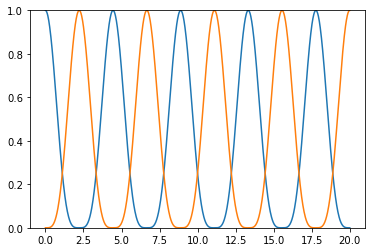

In [23]:
tpts = np.linspace(0,20,1000)
yptsL = ((np.cos(np.sqrt(2)*tpts)+1)/2)**2
yptsR = ((np.cos(np.sqrt(2)*tpts)-1)/2)**2
plt.plot(tpts,yptsL)
plt.plot(tpts,yptsR)
plt.ylim(0,1)

[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]


0.0

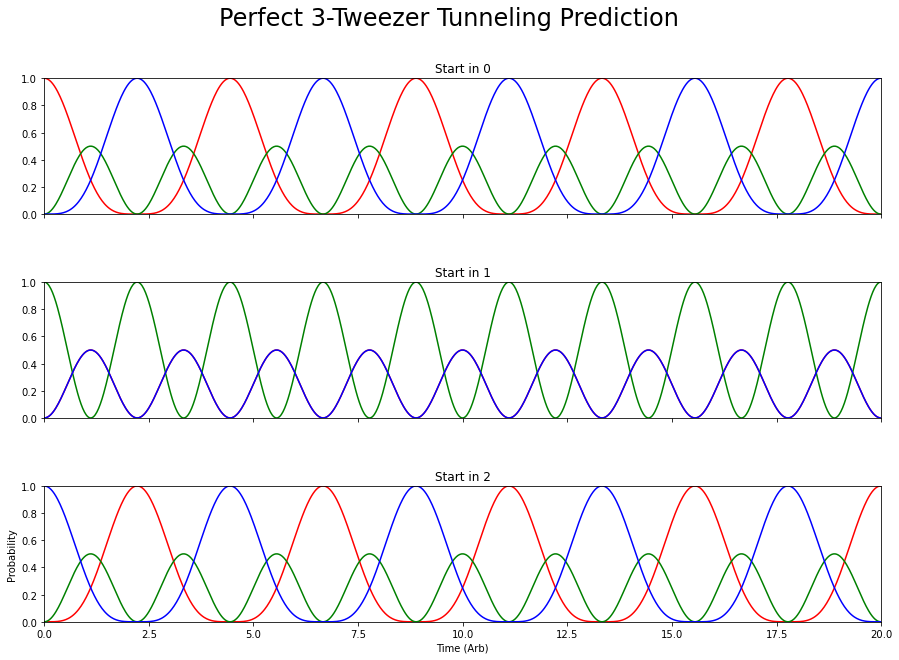

In [3]:
numTweezers = 3
Hamiltonian = np.zeros((numTweezers,numTweezers))
for rowinc, row in enumerate(Hamiltonian):
    for colinc, col in enumerate(row):
        if rowinc == colinc + 1 or rowinc == colinc - 1:
            Hamiltonian[rowinc, colinc] = 1
#Hamiltonian[1,1] = 2
#Hamiltonian[0,0] = 1
print(Hamiltonian)
vals, solution = np.linalg.eig(Hamiltonian)
vecs = solution.T
fig, axs = plt.subplots(numTweezers,1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0.5)
titles = ['Start in ' + str(num) for num in range(numTweezers)]
initStates = []
for tweezer in range(numTweezers):
    state = np.zeros((numTweezers,1))
    state[tweezer][0] = 1
    initStates.append(state)
#colors, _ = getColors(numTweezers, cmStr='gist_rainbow')
colors = ['r','g','b']
for initState, ax, title in zip(initStates, axs, titles):
    stateDecomp = vecs@initState
    times = np.linspace(0,20,1000)
    probs = [[] for _ in range(numTweezers)]
    for time in times:
        stateAtThisTime = np.zeros((numTweezers)).astype(complex)
        for vec, coef, energy in zip(vecs, stateDecomp, vals):
            coef = coef[0]
            stateAtThisTime += vec * coef * np.exp(-1j*energy*time)
        for twNum, coef in enumerate(stateAtThisTime):
            probs[twNum].append(abs(coef)**2)
    for twnum, prob in enumerate(probs):
        ax.plot(times, prob, label='P(' + str(twnum) + ')', color=colors[twnum], linestyle='-')
    ax.set_title(title);
    ax.set_ylim(0,1)
    ax.set_xlim(min(times),max(times))
fig.suptitle('Perfect '+str(numTweezers)+'-Tweezer Tunneling Prediction', fontsize=24)
axs[-1].set_xlabel('Time (Arb)');
axs[-1].set_ylabel('Probability');
Hamiltonian[1,1]

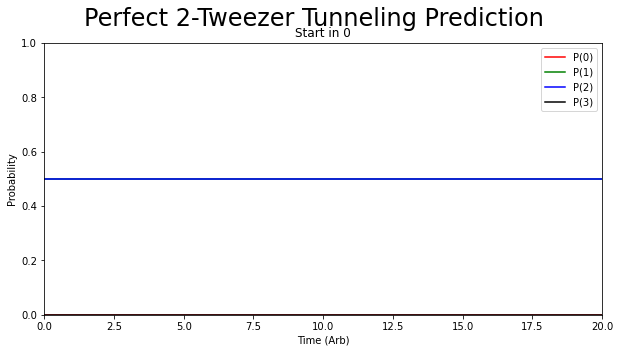

In [52]:
numTweezers = 2
Hamiltonian = np.zeros((numTweezers,numTweezers))
for rowinc, row in enumerate(Hamiltonian):
    for colinc, col in enumerate(row):
        if rowinc == colinc + 1 or rowinc == colinc - 1:
            Hamiltonian[rowinc, colinc] = 1
Hamiltonian = np.kron(Hamiltonian,Hamiltonian)
vals, solution = np.linalg.eig(Hamiltonian)
vecs = solution.T

fig, ax = plt.subplots(1, figsize=(10,5), sharex=True)
fig.subplots_adjust(hspace=0.5)
titles = ['Start in ' + str(num) for num in range(numTweezers)]
initState = np.zeros((numTweezers**2,1))

initState[1][0] = 1
initState[2][0] = 1

initState /= np.linalg.norm(initState)

colors = ['r','g','b','k']
stateDecomp = vecs@initState
times = np.linspace(0,20,1000)
probs = [[] for _ in range(numTweezers**2)]

for time in times:
    stateAtThisTime = np.zeros((numTweezers**2)).astype(complex)
    for vec, coef, energy in zip(vecs, stateDecomp, vals):
        coef = coef[0]
        stateAtThisTime += vec * coef * np.exp(-1j*energy*time)
    for twNum, coef in enumerate(stateAtThisTime):
        probs[twNum].append(abs(coef)**2)
        
for twnum, prob in enumerate(probs):
    ax.plot(times, prob, label='P(' + str(twnum) + ')', color=colors[twnum], linestyle='-')

    
ax.set_title(title);
ax.set_ylim(0,1)
ax.set_xlim(min(times),max(times))
fig.suptitle('Perfect '+str(numTweezers)+'-Tweezer Tunneling Prediction', fontsize=24)
ax.set_xlabel('Time (Arb)');
ax.set_ylabel('Probability');
ax.legend()
Hamiltonian[1,1];